C:\Users\pc\AppData\Local\Temp\ipykernel_4508\4163041238.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None


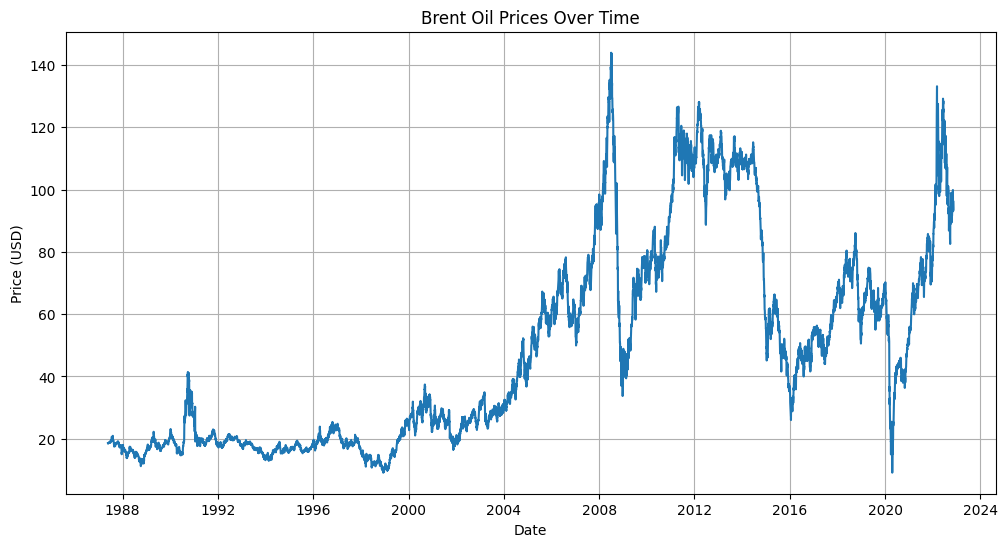

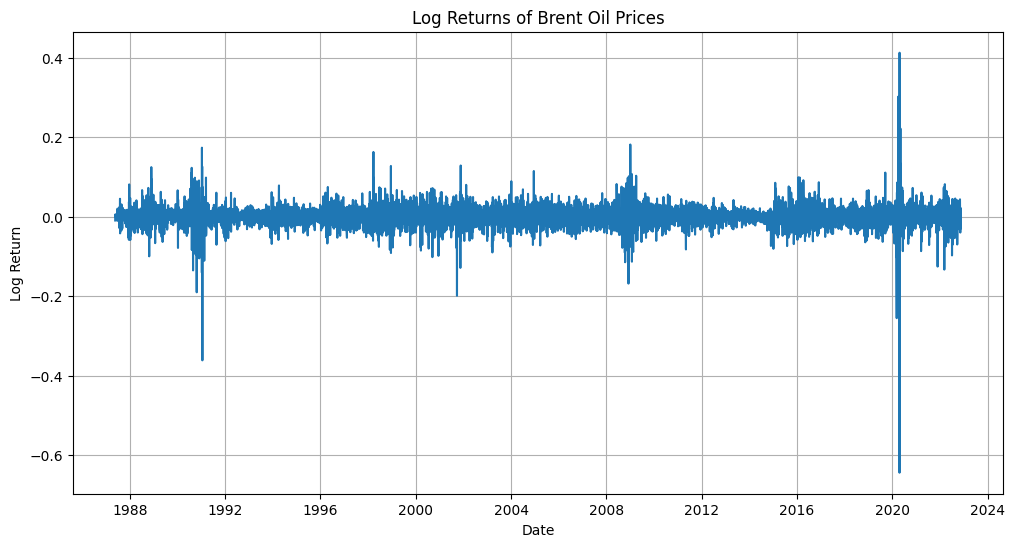

ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load Brent oil price data
def load_brent_data(filepath):
    df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)
    df = df.sort_values('Date')
    return df

brent_df = load_brent_data("C:/Users/pc/Desktop/10 Academy/Week 10/Brentoil/data/brent_prices.csv")

# Quick peek
print(brent_df.head())
print(brent_df.info())

# Plot raw prices
plt.figure(figsize=(12,6))
plt.plot(brent_df['Date'], brent_df['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Load event data (structured with columns: Event, StartDate)
# events_df = pd.read_csv('data/key_events.csv', parse_dates=['StartDate'])
# print(events_df.head())


# Calculate log returns for stationarity
brent_df['LogReturn'] = np.log(brent_df['Price']).diff()

plt.figure(figsize=(12,6))
plt.plot(brent_df['Date'], brent_df['LogReturn'])
plt.title('Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

# Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(brent_df['LogReturn'].dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
